In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# read dataset
df = pd.read_excel('/Users/suhayl/Data Science modules/IGP/Data/IGP_updated_data.xlsx')
df.head(100)

,Year,Total,maternity,population
0,2008-04,6918254,NaN,61823772
1,2008-05,6506145,NaN,61823772
2,2008-06,6809466,NaN,61823772
3,2008-07,7163355,NaN,61823772
4,2008-08,6134809,NaN,61823772
...,...,...,...,...
95,2016-03,8661981,56694.0,65110034
96,2016-04,8578807,56685.0,65648054
97,2016-05,8722411,59343.0,65648054
98,2016-06,9043640,58709.0,65648054


In [25]:
df.drop("maternity", axis=1, inplace=True)

In [26]:
df.drop("population", axis=1, inplace = True)

In [27]:
df.head()

,Year,Total
0,2008-04,6918254
1,2008-05,6506145
2,2008-06,6809466
3,2008-07,7163355
4,2008-08,6134809


In [28]:
df["Year"] = pd.to_datetime(df["Year"])
df.set_index("Year", inplace=True)

<AxesSubplot:xlabel='Year'>

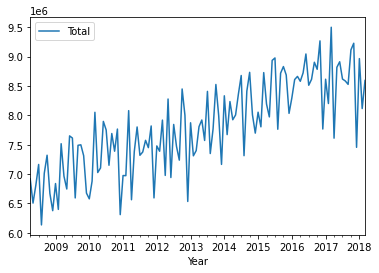

In [23]:
df.plot()

In [29]:
df.head()

,Total
Year,
2008-04-01,6918254
2008-05-01,6506145
2008-06-01,6809466
2008-07-01,7163355
2008-08-01,6134809


In [30]:
print(df.dtypes)

Total    int64
dtype: object


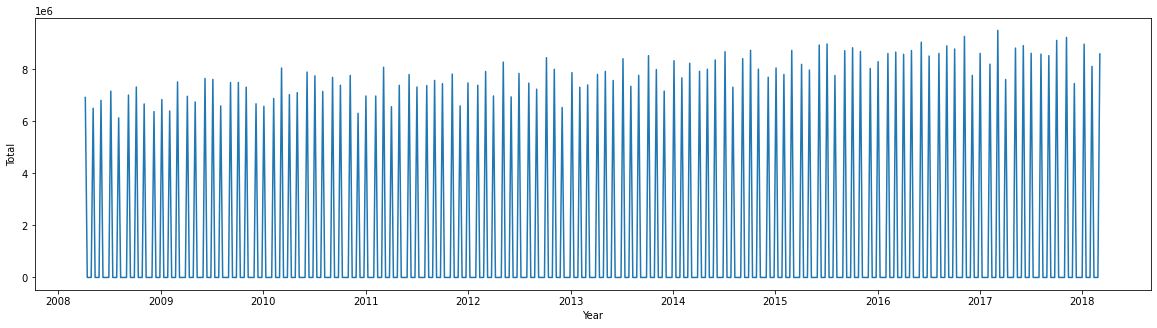

In [53]:
df_by_week = df.resample('W').sum()
#df_by_month.head()
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(20, 5)
sns.lineplot(x=df_by_week.index, y="Total", data=df_by_week, ax=ax1);
#plt.plot(df_by_week['Passengers'])
#df_by_week.head(100)

<AxesSubplot:xlabel='Year', ylabel='Total'>

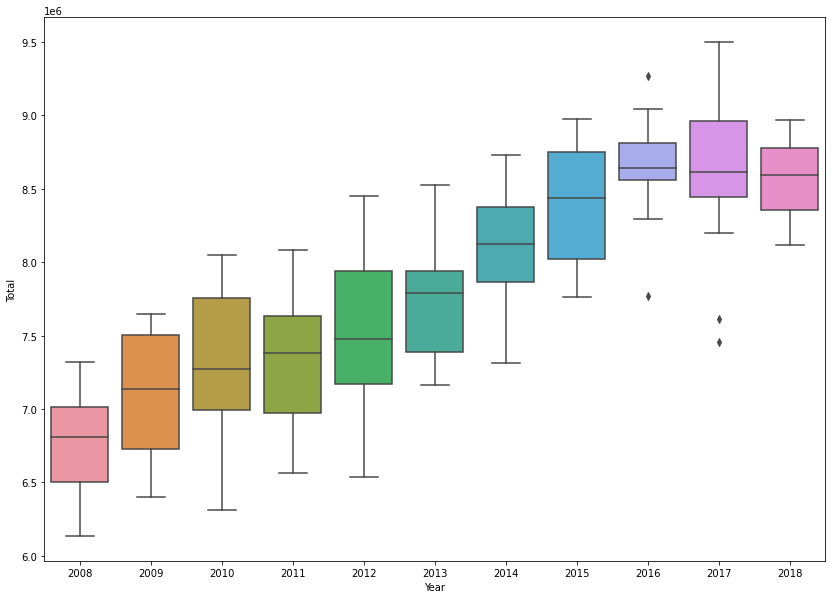

In [32]:
df['Year'] = [d.year for d in df.index]
years = df['Year'].unique()

plt.figure(figsize=(14,10))
#Plot yearly and monthly values as boxplot
sns.boxplot(x='Year', y='Total', data=df)

In [33]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df['Total'])
print("pvalue = ", pvalue)

pvalue =  0.43397417467741156


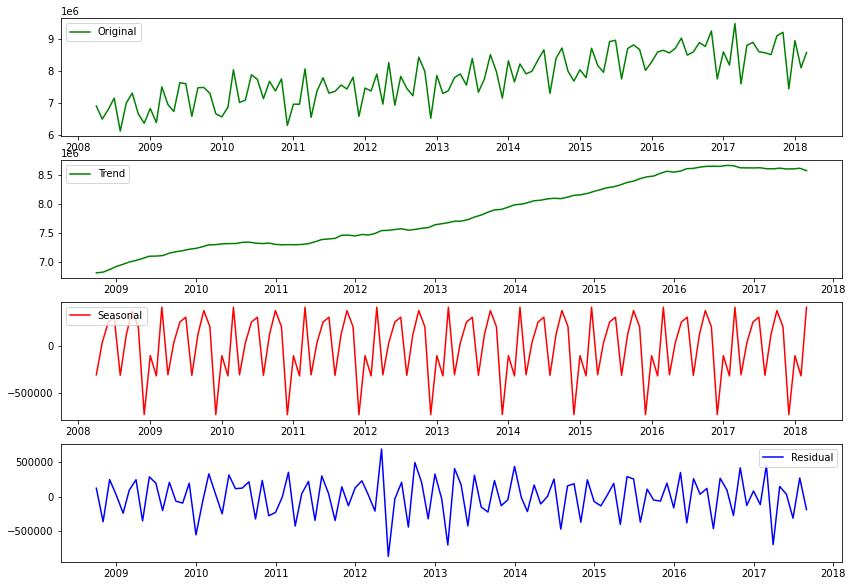

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['Total'] , model ='additive')

#Additive time series:
#Value = Base Level + Trend + Seasonality + Error
#Multiplicative Time Series:
#Value = Base Level x Trend x Seasonality x Error

trend = decomposed.trend
seasonal = decomposed.seasonal 
residual = decomposed.resid

plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(df['Total'], label='Original', color='green')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='blue')
plt.legend(loc='upper right')
plt.show()

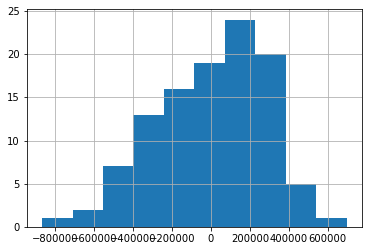

In [35]:
hist = residual.hist()

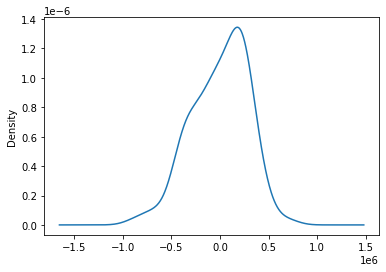

In [36]:
residual.plot(kind='kde')
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

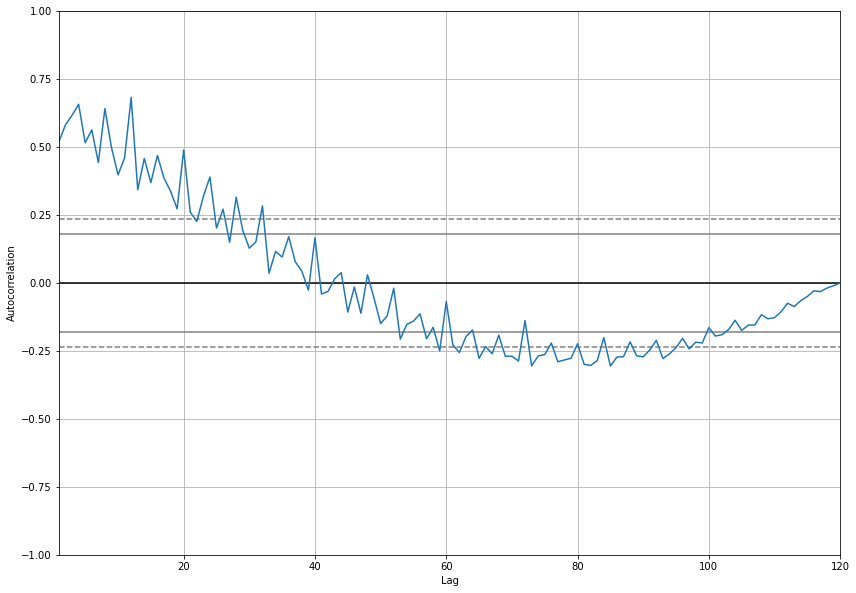

In [37]:
plt.figure(figsize=(14,10))

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df.Total)

In [38]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


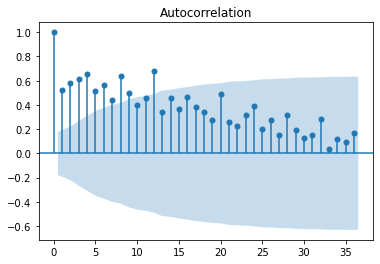

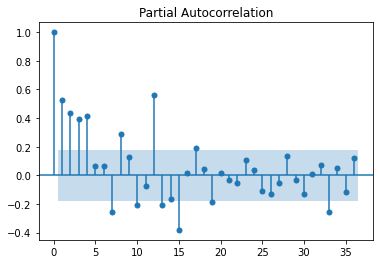

In [39]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(df.Total, lags=36) 
plt.show()

plot_pacf(df.Total, lags=36) 
plt.show()

In [42]:
df.drop("Year", axis = 1, inplace=True)

In [43]:
train_size = int(len(df) * 0.66)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]
print(len(train), len(test))
test.shape
#train.shape
#train.head()
#print(test)

79 41


(41, 1)

In [44]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

model = ARIMA(df['Total'], order=(1,1,1))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1767.576
Date:                Fri, 29 Apr 2022   AIC                           3541.151
Time:                        18:22:00   BIC                           3549.489
Sample:                    04-01-2008   HQIC                          3544.537
                         - 03-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0112      0.034      0.325      0.745      -0.056       0.078
ma.L1         -0.6155      0.042    -14.546      0.000      -0.698      -0.533
sigma2      2.348e+11   4.54e-14   5.17e+24      0.0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


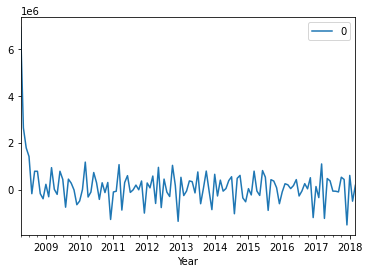

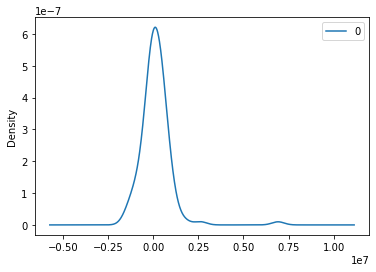

In [45]:
# line plot of residuals
residuals = DataFrame(model_fit.resid) 

residuals.plot()

plt.show()
# density plot of residuals 
residuals.plot(kind='kde', label='Residuals')
plt.show()
# summary stats of residuals print(residuals.describe())

<AxesSubplot:xlabel='Year'>

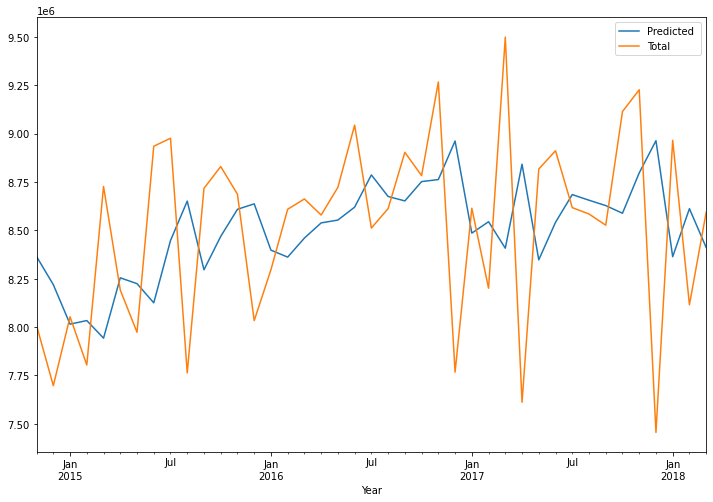

In [46]:
start_index = 0
end_index = len(train)-1
train_prediction = model_fit.predict(start_index, end_index) 

#Prediction (test set)
start_index = len(train)
end_index = len(df)-1
prediction = model_fit.predict(start_index, end_index).rename('Predicted ') 
#Rename the column

# plot predictions and actual values
plt.figure(figsize=(12,8))
prediction.plot(legend = True)
test['Total'].plot(legend = True)   # true values

In [47]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(train, train_prediction))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test, prediction))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1027844.43 RMSE
Test Score: 547240.15 RMSE


In [48]:
from sklearn.metrics import r2_score
score = r2_score(test, prediction)
print("R2 score is: ", score)

R2 score is:  -0.26342626952974046


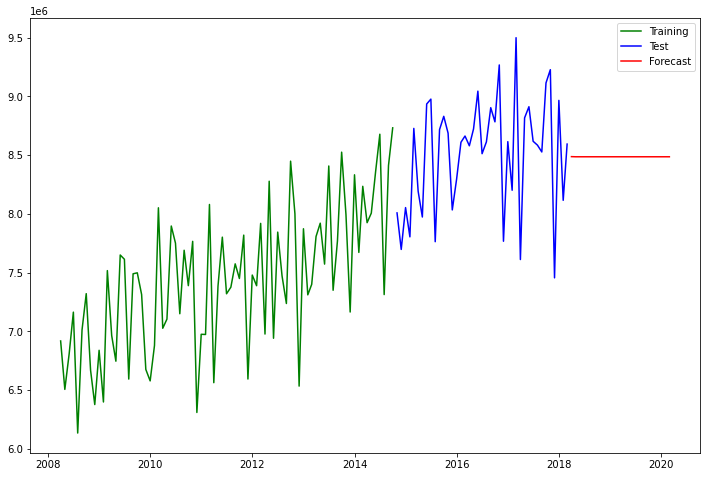

In [50]:
forecast = model_fit.predict(start = len(df),  
                          end = (len(df)-1) +2 * 12,  
                          typ = 'levels').rename('Forecast') 
  
plt.figure(figsize=(12,8))
plt.plot(train, label='Training', color='green')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.show()

predicted=8937693.083661, expected=7611013.000000
predicted=8277961.592350, expected=8816683.000000
predicted=8547598.858011, expected=8911174.000000
predicted=8705619.850362, expected=8617260.000000
predicted=8614070.648873, expected=8584193.000000
predicted=8685992.435651, expected=8526287.000000
predicted=8570483.175204, expected=9113583.000000
predicted=8823931.982132, expected=9226346.000000
predicted=8988308.734302, expected=7455220.000000
predicted=8342107.809552, expected=8965179.000000
predicted=8686132.326583, expected=8114870.000000
predicted=8376879.930069, expected=8593300.000000
Test RMSE: 694342.925


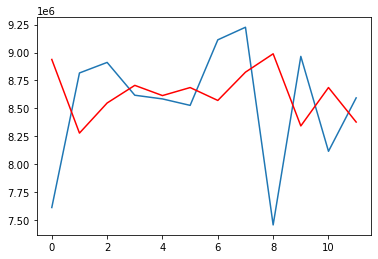

In [51]:
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_squared_error 
from math import sqrt

X = df.values
size = int(len(X) * 0.9)
trainR, testR = X[0:size], X[size:len(X)] 
history = [x for x in trainR] 
predictionsR = list()
# walk-forward validation
for t in range(len(testR)):
  model = ARIMA(history, order=(5,1,0)) 
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0] 
  predictionsR.append(yhat)
  obs = testR[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(testR, predictionsR)) 
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes 
plt.plot(testR)
plt.plot(predictionsR, color='red') 
plt.show()